In [1]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/dataset_dict_prune/retest'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [2]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

One or Two-Tail P Values?

- ``` tails = 'one_tail' or tails = 'two_tail' ```

Numer of permutations? 
- Pearson is ~10x faster than Spearman

Would you like to compare maps wiht spearman or pearson?

- ``` method = 'spearman' or method = 'pearson' ```

Would you like to FWE correct the pairwise matrix?

- ``` fwe = True or fwe = False ```

In [14]:
tails = 'two_tail'
n_permutations = 1
method = 'pearson'
fwe = False
datasets_to_flip = []#'Alzheimer Disease', 'Multiple Sclerosis', 'Penetrating TBI']# ['Parietal TMS Hebscher'] #['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory']

Run it

In [16]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=datasets_to_flip,
                                           n_permutations=n_permutations,
                                           out_dir=out_dir,
                                           topology_command=None)
p_value, pairwise_p_values = correlation_analysis.run(tails, fwe)

Running permutations: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]

Calculating two-tailed p-values
The observed average similarity is: 0.3356419105669907
The two_tail p-value is: 0.0. This is the proportion of permuted averages that are greater than the observed average.
Overall p-value: 0.0


# 02 - Visualize Results

Similarity matrix (Signs Included)

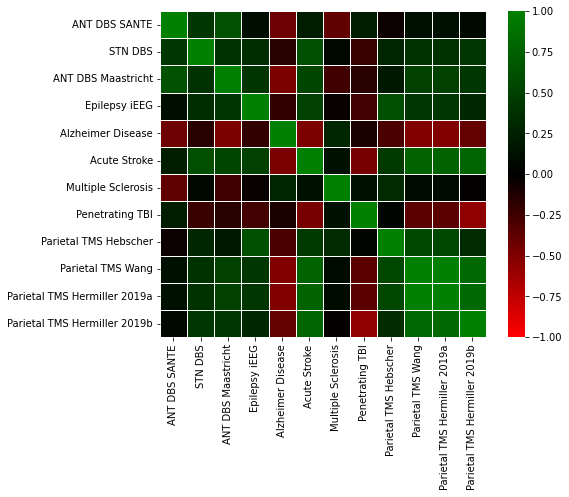

In [17]:
limit = correlation_analysis.matrix_heatmap(correlation_analysis.original_similarity_matrix, type='similarity', output_path=out_dir)

View the Overall Similarities of the Topology, Signs Aside

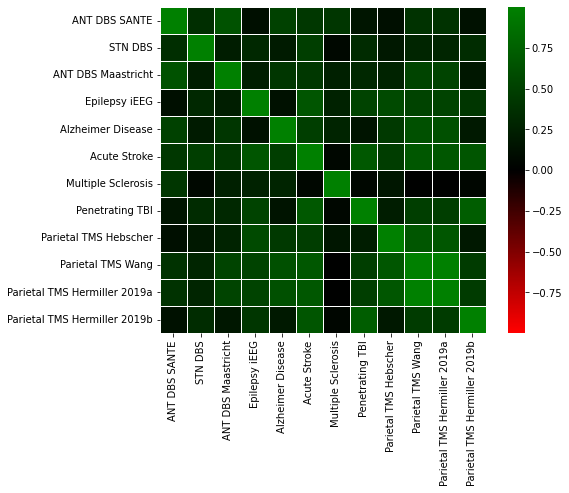

In [6]:
import numpy as np
limit = correlation_analysis.matrix_heatmap(np.abs(correlation_analysis.original_similarity_matrix), type='similarity', output_path=out_dir+'/heatmap_similarity_absval.svg')

Permuted Similarity

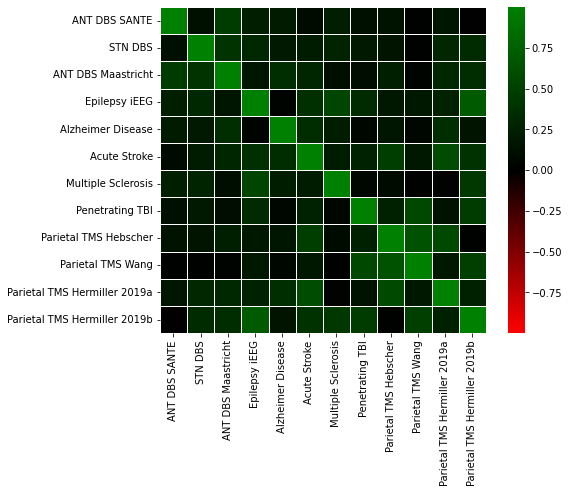

In [7]:
import numpy as np
avg_sim_mx = np.mean(correlation_analysis.permuted_similarity_tensor, axis=0)
l = correlation_analysis.matrix_heatmap(avg_sim_mx, type='similarity', output_path=out_dir+'/heatmap_similarity_permuted.svg', limit=limit)

Pairwise P values Matrix

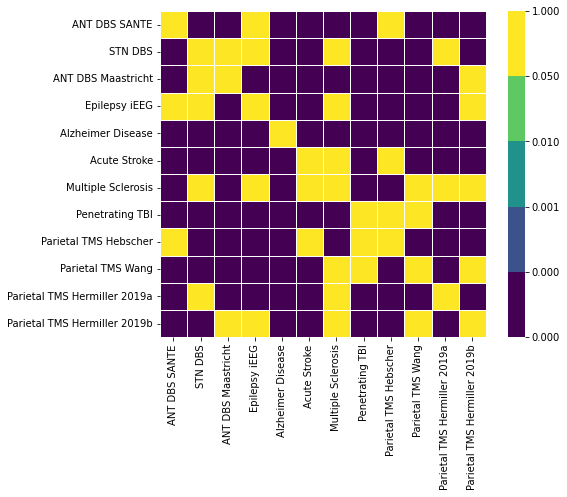

In [8]:
correlation_analysis.matrix_heatmap(pairwise_p_values, type='pvals', output_path=out_dir)

In [9]:
pairwise_p_values

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.]])

# Optional - Run a Leave-One-Fold-Out Evaluation
- This assesses if any specific dataset or datasets are driving your effect

Define Parameters

In [10]:
tails = 'two_tail'
n_permutations = 1000
method = 'spearman'
fwe = False
datasets_to_flip = []

Define folds as an array of lists. Each list is a fold which will be left out during the evaluation. 
- The names you can enter are in your JSON file, printed below

In [11]:
import json

with open(dict_path, 'r') as f:
    data_dict = json.load(f)

print(data_dict.keys())

dict_keys(['ANT DBS SANTE', 'STN DBS', 'ANT DBS Maastricht', 'Epilepsy iEEG', 'Alzheimer Disease', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI', 'Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b'])


In [12]:
folds = [['ANT DBS SANTE','STN DBS','ANT DBS Maastricht','Epilepsy iEEG'], ['Alzheimer Disease', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI'], ['Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b']]

Run Evaluation

In [13]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=[],
                                           n_permutations=n_permutations,
                                           out_dir=out_dir,
                                           topology_command=None)
p_value, pairwise_p_values = correlation_analysis.run_lofo(folds, tails, fwe)

Running permutations:   0%|          | 2/1000 [00:06<52:37,  3.16s/it]


KeyboardInterrupt: 

# Optional - Evaluate P-Values Across Specific Slices of the Similarity Matrix

In [ ]:
import numpy as np
obsv = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/all_data/unaligned/original_similarity_matrix.npy')
perm = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/all_data/unaligned/permuted_similarity_tensor.npy')

In [ ]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis

p, r = CorrelationAnalysis.calculate_slice_p_value(
    obsv,
    perm,
    row_indices=[8,9,10,11],
    col_indices=[8,9,10,11],
    method='two_tail',
    absolute_similarity=True,
    remove_diagonal=True
)
print("p: ", p)
print("r: ", r)

p:  0.041
r:  0.43020064295854193
